In [5]:
import pandas as pd
import geopandas as gpd
import cartopy.crs as ccrs
import matplotlib

In [6]:
dfl = pd.read_csv('C:/Users/dego/OneDrive - Virginia Tech/RSSA/platte_stats.csv')

lc = ccrs.LambertConformal()
widths = gpd.GeoDataFrame(
    dfl, geometry=gpd.points_from_xy(dfl['longitude'], dfl['latitude']),
    crs='EPSG:4326'
).to_crs(lc.proj4_init)

In [7]:
fpnk14 = 'C:/Users/dego/OneDrive - Virginia Tech/RSSA/Platte_centerlines_masks/Vector_centerlines/NK14/NK14_w_image.shp'
nk14 = gpd.read_file(fpnk14).to_crs(lc.proj4_init)
fpnk13 = 'C:/Users/dego/OneDrive - Virginia Tech/RSSA/Platte_centerlines_masks/Vector_centerlines/NK13/NK13_w_image.shp'
nk13 = gpd.read_file(fpnk13).to_crs(lc.proj4_init)
fpnj13 = 'C:/Users/dego/OneDrive - Virginia Tech/RSSA/Platte_centerlines_masks/Vector_centerlines/NJ13/NJ13_w_image.shp'
nj13 = gpd.read_file(fpnj13).to_crs(lc.proj4_init)
fpnk15 = 'C:/Users/dego/OneDrive - Virginia Tech/RSSA/Platte_centerlines_masks/Vector_centerlines/NK15/NK15_w_image.shp'
nk15 = gpd.read_file(fpnk15).to_crs(lc.proj4_init)
centerlines = gpd.GeoDataFrame( pd.concat( [nj13, nk13, nk14, nk15], ignore_index=True) )

492104


In [8]:
widths = widths.loc[widths['width'] != -999]

In [10]:
def iqr(column):
    return(column.quantile(0.75) - column.quantile(0.25))

def order(column):
    return(column['SO'])

In [18]:
grouped = widths.groupby(['geometry'])

In [70]:
dry_stats = widths.groupby(['longitude', 'latitude']).agg(
    dry_mean=('width', 'mean'),
    dry_std=('width', 'std'),
    dry_median=('width', 'median'),
    dry_max=('width', 'max'),
    dry_min=('width', 'min'),
    dry_count=('width', 'count'),
    dry_iqr=('width', iqr),
    stream_order=('SO', 'first')  # Use 'first' since stream order is constant
).reset_index()

# Rename columns for clarity
# dry_stats.rename(columns={'mean': 'dry_mean', 'std': 'dry_std', 'median': 'dry_median', 'max': 'dry_max', 'min': 'dry_min', 'count': 'dry_count', 'iqr': 'dry_iqr'}, inplace=True)

wet_widths = widths.loc[widths['width'] != 0]
wet_stats = wet_widths.groupby(['longitude', 'latitude']).agg(
    wet_mean=('width', 'mean'),
    wet_std=('width', 'std'),
    wet_median=('width', 'median'),
    wet_max=('width', 'max'),
    wet_min=('width', 'min'),
    wet_count=('width', 'count'),
    wet_iqr=('width', iqr),
    stream_order=('SO', 'first')  # Use 'first' since stream order is constant
).reset_index()

# # Save the aggregated statistics to a new CSV
# output_path = "C:/Users/dego/Desktop/aggregated_stats.csv"  # Replace with your desired output path
# dry_stats.to_csv(output_path, index=False)

# print(f"Aggregated statistics saved to {output_path}")

In [159]:
lc = ccrs.LambertConformal()
utm14 = ccrs.epsg(32614)
ws = gpd.GeoDataFrame(
    wet_stats, geometry=gpd.points_from_xy(wet_stats['longitude'], wet_stats['latitude']),
    crs='EPSG:4326'
).to_crs(utm14.proj4_init)

# ds = gpd.GeoDataFrame(
#     dry_stats, geometry=gpd.points_from_xy(dry_stats['longitude'], dry_stats['latitude']),
#     crs='EPSG:4326'
# ).to_crs(3857)

# %matplotlib inline
# ws.plot(column='wet_mean')


# wet_stats.to_csv('C:/Users/dego/OneDrive - Virginia Tech/RSSA/wet_spatial_stats.csv')
# dry_stats.to_csv('C:/Users/dego/OneDrive - Virginia Tech/RSSA/dry_spatial_stats.csv')

Text(0.5, 1.0, 'Width IQR (m)')

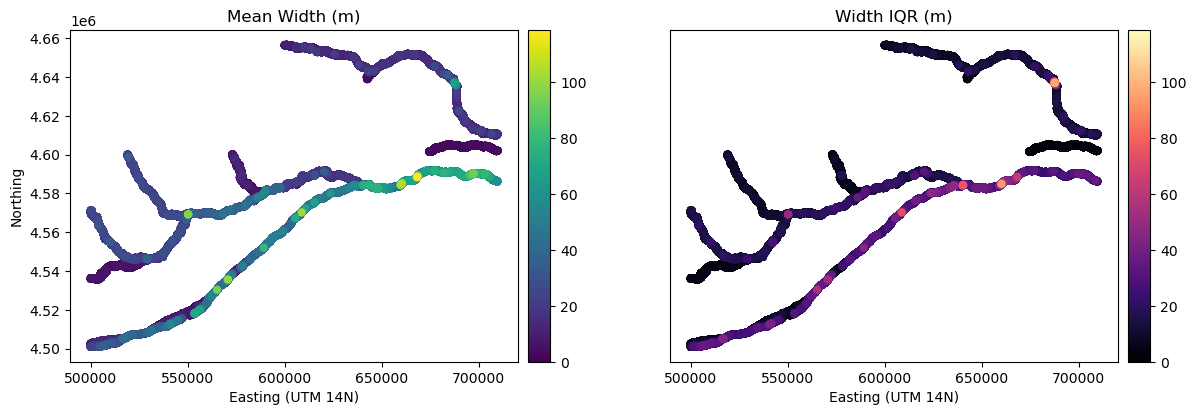

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

width_norm = matplotlib.colors.Normalize(vmin=0, vmax=ws['wet_mean'].max())
iqr_norm = matplotlib.colors.Normalize(vmin=0, vmax=ws['wet_mean'].max())

fig = plt.figure(figsize=(12, 12))
# main = fig.add_subplot(1, 1, 1, projection=utm14)
ax1 = plt.axes((0, 0, 0.4, 1))
ax2 = plt.axes((0.5, 0, 0.4, 1))

divider1 = make_axes_locatable(ax1)
cax1 = divider1.append_axes('right', size='5%', pad=0.1)

divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes('right', size='5%', pad=0.1)

ws.sort_values('wet_mean').plot(ax=ax1,
         column='wet_mean',
         markersize=25,
         norm=width_norm,
         legend=True,
         cax=cax1)
        #  legend_kwds={'label': 'Mean width (m)'})

ws.sort_values('wet_iqr').plot(ax=ax2,
        column='wet_iqr',
        markersize=25,
        legend=True,
        cmap='magma',
        norm=iqr_norm,
        cax=cax2)
        # legend_kwds={'label': 'Width IQR (m)'})

ax1.set_xlabel('Easting (UTM 14N)')
ax1.set_ylabel('Northing')
ax1.set_title('Mean Width (m)')

ax2.set_xlabel('Easting (UTM 14N)')
ax2.set_yticks([])
ax2.set_title('Width IQR (m)')
